In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr

In [ ]:
!wget https://raw.githubusercontent.com/Bopobywek/sqm-article-code/main/data.csv

--2024-02-24 16:42:01--  https://raw.githubusercontent.com/Bopobywek/sqm-article-code/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58389651 (56M) [text/plain]
Saving to: ‘data.csv.12’

data.csv.12         100%[===================>]  55.68M   251MB/s    in 0.2s    

2024-02-24 16:42:02 (251 MB/s) - ‘data.csv.12’ saved [58389651/58389651]



In [ ]:
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [ ]:
df['Total Cognitive Complexity'] = pd.to_numeric(df['Total Cognitive Complexity'], errors='coerce')

# Filter rows where the value in the specified column is not a number
non_numeric_rows = df[df['Total Cognitive Complexity'].isna()]

In [ ]:
non_numeric_rows

,File,NCSS,Total Cognitive Complexity,Cyclomatic Complexity,Overloads
18228,/fineract-core/src/main/java/org/apache/finera...,40,NaN,10,0
29268,/tools/validator/src/main/java/org/apache/cxf/...,125,NaN,36,0
29272,/tools/validator/src/main/java/org/apache/cxf/...,21,NaN,2,0
30492,/gremlin-groovy/src/main/java/org/apache/tinke...,13,NaN,4,0
30663,/streampark-flink/streampark-flink-connector/s...,91,NaN,1,0
...,...,...,...,...,...
541817,/worldedit-core/src/main/java/com/sk89q/worlde...,15,NaN,2,0
549301,/src/java/voldemort/serialization/json/JsonWri...,52,NaN,11,0
549305,/src/java/voldemort/serialization/ObjectSerial...,11,NaN,3,0
558270,/sdk/netapp/azure-resourcemanager-netapp/src/m...,10,NaN,1,0


In [ ]:
df.isna().any()

File                          False
NCSS                          False
Total Cognitive Complexity     True
Cyclomatic Complexity         False
Overloads                     False
dtype: bool

In [ ]:
df = df[df['Total Cognitive Complexity'].notna()]
df['Presence of overloads'] = df['Overloads']

<ipython-input-295-5bcfeb91ef15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Presence of overloads'] = df['Overloads']


In [ ]:
df['Overloads'].value_counts()

0    469385
1     95055
Name: Overloads, dtype: int64

In [ ]:
np.quantile(df['Cyclomatic Complexity'], 0.99)

142.0

In [ ]:
df = df[(df["NCSS"] < np.quantile(df['NCSS'], 0.95)) & (df["Cyclomatic Complexity"] < np.quantile(df['Cyclomatic Complexity'], 0.99)) & (df['Total Cognitive Complexity'] < np.quantile(df['Total Cognitive Complexity'], 0.99))]

In [ ]:
df['Overloads'].value_counts()

0    463500
1     72503
Name: Overloads, dtype: int64

In [ ]:
df['Overloads'].value_counts()

0    463500
1     72503
Name: Overloads, dtype: int64

In [ ]:
df['Overloads'].value_counts()

0    463500
1     72503
Name: Overloads, dtype: int64

Point-Biserial Correlation Coefficient (Presence of overloads & Total Cognitive Complexity): 0.2868779279590481
Point-Biserial Correlation Coefficient (Presence of overloads & Cyclomatic Complexity): 0.30249810082633893


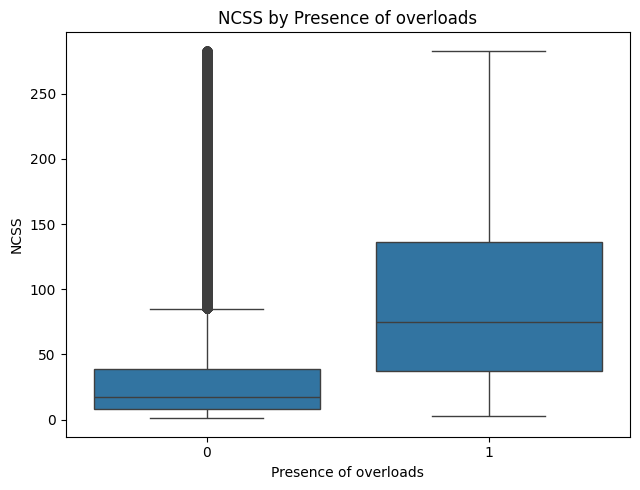

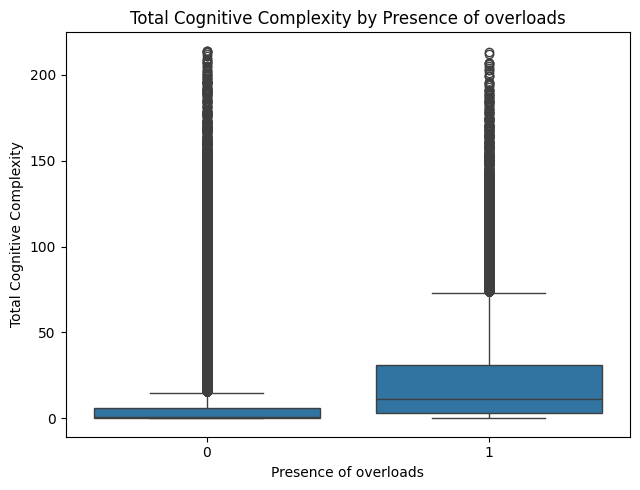

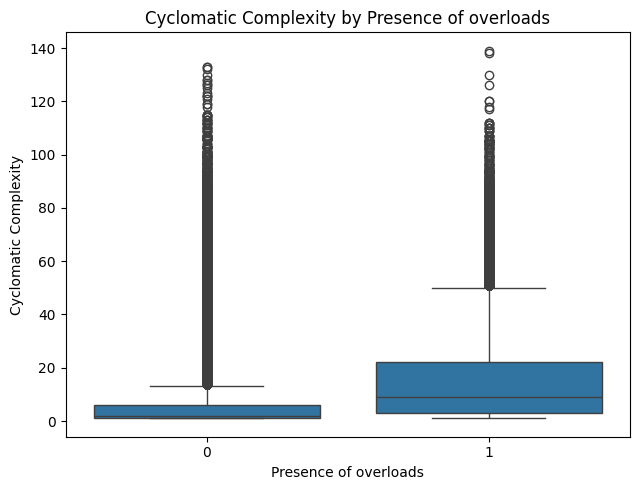

In [ ]:
correlation_total_complexity, _ = pointbiserialr(df['Presence of overloads'], df['Total Cognitive Complexity'])
correlation_cyclomatic_complexity, _ = pointbiserialr(df['Presence of overloads'], df['Cyclomatic Complexity'])

print(f"Point-Biserial Correlation Coefficient (Presence of overloads & Total Cognitive Complexity): {correlation_total_complexity}")
print(f"Point-Biserial Correlation Coefficient (Presence of overloads & Cyclomatic Complexity): {correlation_cyclomatic_complexity}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
# Box plot for NCSS
sns.boxplot(x='Presence of overloads', y='NCSS', data=df, ax=axes)
axes.set_title('NCSS by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_1.png")

# Box plot for Total Cognitive Complexity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.boxplot(x='Presence of overloads', y='Total Cognitive Complexity', data=df, ax=axes)
axes.set_title('Total Cognitive Complexity by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_2.png")

# Box plot for Cyclomatic Complexity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.boxplot(x='Presence of overloads', y='Cyclomatic Complexity', data=df, ax=axes)
axes.set_title('Cyclomatic Complexity by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_3.png")

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('Presence of overloads')['NCSS'].median()

Presence of overloads
0    17.0
1    75.0
Name: NCSS, dtype: float64

In [ ]:
def balance_binary_classes(group):
    count_0 = group['Overloads'].eq(0).sum()
    count_1 = group['Overloads'].eq(1).sum()

    min_count = min(count_0, count_1)

    if min_count > 0:
        balanced_group = pd.concat([
            group[group['Overloads'] == 0].sample(min_count),
            group[group['Overloads'] == 1].sample(min_count)
        ])
        return balanced_group
    else:
        return group


In [ ]:
df['NCSS bins'] = pd.cut(df['NCSS'], bins=7)

balanced_df = df.groupby('NCSS bins').apply(balance_binary_classes)
balanced_df.reset_index(drop=True, inplace=True)
df = balanced_df

Text(0.5, 1.0, 'Average Cyclomatic Complexity by NCSS bins')

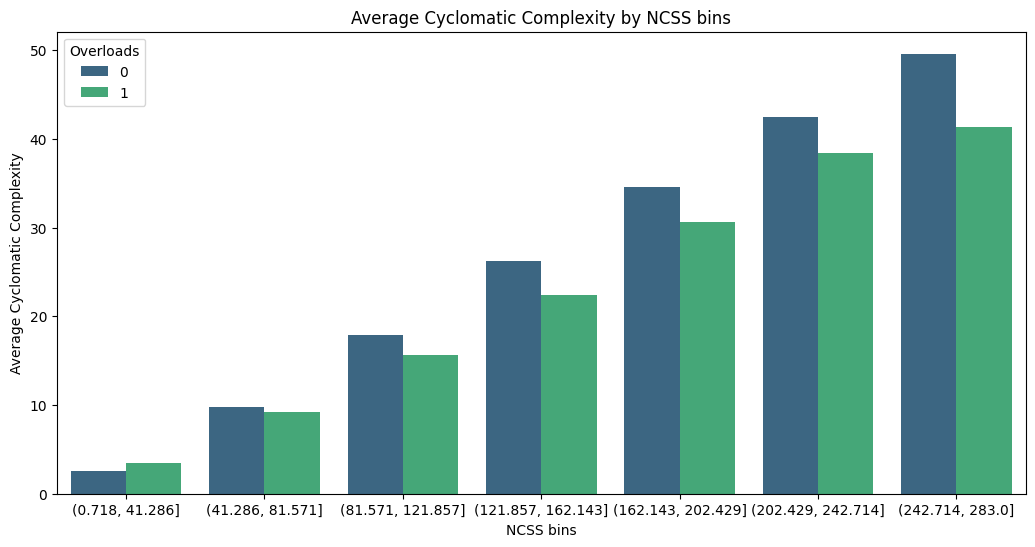

In [ ]:
mean_complexity_by_bin = df.groupby(['NCSS bins', 'Overloads'])['Cyclomatic Complexity'].mean().reset_index()

plt.figure(figsize=(12.5, 6))
sns.barplot(data=mean_complexity_by_bin, x='NCSS bins', y='Cyclomatic Complexity', hue='Overloads', palette='viridis')
plt.ylabel("Average Cyclomatic Complexity")
plt.title("Average Cyclomatic Complexity by NCSS bins")

In [ ]:
count_by_bin = pd.DataFrame(df.groupby(['NCSS bins', 'Overloads']).size())
count_by_bin

0
NCSS bins          Overloads       
(0.718, 41.286]    0          20753
                   1          20753
(41.286, 81.571]   0          17907
                   1          17907
(81.571, 121.857]  0          12268
                   1          12268
(121.857, 162.143] 0           7976
                   1           7976
(162.143, 202.429] 0           5292
                   1           5292
(202.429, 242.714] 0           3121
                   1           3121
(242.714, 283.0]   0           2111
                   1           2111

In [ ]:
mean_complexity_by_bin

,NCSS bins,Overloads,Cyclomatic Complexity
0,"(0.718, 41.286]",0,2.510770
1,"(0.718, 41.286]",1,3.431986
2,"(41.286, 81.571]",0,9.803373
3,"(41.286, 81.571]",1,9.172670
4,"(81.571, 121.857]",0,17.937398
5,"(81.571, 121.857]",1,15.666449
6,"(121.857, 162.143]",0,26.177658
7,"(121.857, 162.143]",1,22.411861
8,"(162.143, 202.429]",0,34.604497
9,"(162.143, 202.429]",1,30.684240


In [ ]:
max(df['NCSS'])

283